# Extracción (E - Extract)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.sample(3)

,customerID,Churn,customer,phone,internet,account
3576,4927-WWOOZ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6379,8761-NSOBC,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
835,1184-PJVDB,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformación (Transform - T)

## Normalizando los datos

Las columnas customer, phone, internet, account tienen diccionarios. Se procede a descubrir que informacion posee cada una

### Normalizando **customer**

In [46]:
customer = pd.json_normalize(datos['customer'])
customer.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure
4235,Male,0,Yes,Yes,56
4404,Female,0,No,No,1
3087,Male,0,Yes,No,16
2233,Female,0,Yes,No,59
899,Female,1,Yes,No,68
721,Female,0,Yes,Yes,68
3390,Male,0,No,No,67
4508,Male,0,Yes,No,72
7151,Male,0,No,No,3
3161,Female,1,No,No,27


### Normalizando **phone**

In [47]:
phone = pd.json_normalize(datos['phone'])
phone.sample(10)

,PhoneService,MultipleLines
1027,Yes,Yes
4879,Yes,Yes
2654,Yes,Yes
6606,Yes,No
3065,Yes,No
1345,Yes,Yes
2248,Yes,No
6437,No,No phone service
1699,Yes,No
2521,Yes,Yes


### Normalizando **internet**

In [48]:
internet = pd.json_normalize(datos['internet'])
internet.sample(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5918,DSL,No,No,No,No,No,No
6402,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4502,DSL,Yes,Yes,No,Yes,No,No
2283,DSL,No,Yes,Yes,Yes,No,Yes
6074,Fiber optic,No,No,No,Yes,Yes,Yes
5143,Fiber optic,No,No,No,No,Yes,No
4299,Fiber optic,Yes,No,No,Yes,Yes,No
6285,DSL,Yes,No,No,No,Yes,No
4827,DSL,Yes,Yes,No,Yes,Yes,Yes
6509,Fiber optic,Yes,Yes,No,No,Yes,No


### Normalizando **account**

In [49]:
account = pd.json_normalize(datos['account'])
account.sample(10)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3994,Two year,No,Bank transfer (automatic),80.65,5542.55
7235,Month-to-month,Yes,Electronic check,79.45,3013.05
651,Month-to-month,Yes,Electronic check,29.90,118.25
6598,Month-to-month,Yes,Bank transfer (automatic),59.95,1406
5762,Two year,No,Credit card (automatic),88.55,6362.35
7171,Two year,Yes,Credit card (automatic),108.05,7806.6
1916,Two year,No,Mailed check,71.10,213.35
1737,Two year,No,Electronic check,111.65,7943.45
6239,Two year,No,Bank transfer (automatic),50.55,3260.1
2932,Two year,Yes,Bank transfer (automatic),87.55,6463.15


#### Uniendo las tablas
Se unen las tablas normalizadas a una nueva unificada llamada datos_normalizado

In [50]:
datos_normalizado = pd.concat(
    [
        datos.drop(columns=['customer', 'phone', 'internet', 'account']),
        customer, phone, internet, account
    ],
    axis=1
)
datos_normalizado.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5698,7785-RDVIG,No,Female,0,Yes,Yes,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,54.7
5723,7817-OMJNA,No,Male,0,No,No,14,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.40,275.7
5159,7036-ZZKBD,No,Male,0,Yes,No,31,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),66.40,2019.8
3378,4691-NEWPF,,Male,0,Yes,No,11,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.90,521.9
300,0432-CAJZV,No,Male,0,No,No,3,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,90.70,237.65
1930,2725-TTRIQ,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),84.20,5986.55
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
2678,3721-CNEYS,Yes,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.95,137.95
3539,4879-GZLFH,No,Female,0,Yes,Yes,42,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.15,3875.4
256,0378-CJKPV,No,Female,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),112.10,7965.95


## Conociendo el conjunto de datos

### dtypes

In [51]:
datos_normalizado.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

Se puede comprobar que hay consistencia del tipo de datos con la descripción de la columna, a excepción de Charges.Total, donde deberia de se float.64.

### info()

In [52]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Se comprueba que no hay valores nulos en ninguna columna

#### Transformando columna Charges.Total

Primero se convierten todas las celdas que no contienen ningun valor a 0, despues se convierte cualquier numero que este como cadena de texto a float64. Por ultimo, se verifica que ahora la serie sea de tipo float64.

In [53]:

datos_normalizado['Charges.Total']= datos_normalizado['Charges.Total'].apply(lambda x: 0 if str(x).strip() == "" else x)
datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].astype(np.float64)
datos_normalizado['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7267 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


### Verificando Duplicados

Se verifica por algun costumerID duplicado

In [54]:
datos_normalizado[datos_normalizado.duplicated(subset="customerID", keep=False)]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [55]:
# Lista de columnas que quieres revisar
datos_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

Se busca por los valores unicos en las columnas para encontrar incosistencias en las columnas. Todos llevan logica a excepcion de la serie Churn que contiene valor "".

In [56]:
columnas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling']  # Agrega aquí todas las que quieras

for col in columnas:
    print(f"{col}: {pd.unique(datos_normalizado[col])}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']


In [57]:
(datos_normalizado['Churn'] == "").sum()

np.int64(224)

In [58]:
datos_normalizado = datos_normalizado[datos_normalizado['Churn'] != ""]

In [59]:
columnas = [
    'Churn', 'Partner', 'gender',
    'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod']  # Agrega aquí todas las que quieras

for col in columnas:
    datos_normalizado[col] = datos_normalizado[col].apply(lambda x: 1 if x in ['Yes', 'Male'] 
                                                                 else 0 if x in ['No', 'No phone service', 'No internet service', 'Female']
                                                                 else x)
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   int64  
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

In [60]:
columnas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling']
for col in columnas:
    print(f"{col}: {pd.unique(datos_normalizado[col])}")

Churn: [0 1]
gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]


In [61]:
datos_normalizado = datos_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'ciudadano_senior',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'PhoneService': 'servicio_telefono',
    'MultipleLines': 'multiples_lineas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'contrato',
    'PaperlessBilling': 'factura_sin_papel',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total'
})

datos_normalizado.columns

Index(['id_cliente', 'abandono', 'genero', 'ciudadano_senior', 'pareja',
       'dependientes', 'antiguedad_meses', 'servicio_telefono',
       'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'backup_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'contrato', 'factura_sin_papel',
       'metodo_pago', 'cargo_mensual', 'cargo_total'],
      dtype='object')

In [62]:
# Paso 1: Crea las nuevas columnas one-hot de una sola vez
# Esto genera un DataFrame con 'servicio_internet_DSL', 'servicio_internet_Fiber optic' y 'servicio_internet_0'
nuevas_columnas = pd.get_dummies(datos_normalizado['servicio_internet'], prefix='servicio_internet', dtype=int)

# Paso 2: Encuentra la posición de la columna 'servicio_internet'
# Esto nos da el índice (número de columna) de 'servicio_internet'
posicion = datos_normalizado.columns.get_loc('servicio_internet')

# Paso 3: Inserta las nuevas columnas en el DataFrame original
# Itera sobre las columnas creadas en el paso 1
for i, col in enumerate(nuevas_columnas.columns):
    # 'insert' añade la columna en la posición deseada
    # La posición se ajusta con 'i + 1' para que se inserten en orden
    datos_normalizado.insert(posicion + i + 1, col, nuevas_columnas[col])

# Paso 4: Elimina la columna redundante
# Eliminamos la columna de 'sin servicio' porque la información ya está en la columna original
datos_normalizado.drop('servicio_internet_0', axis=1, inplace=True)

datos_normalizado = datos_normalizado.rename(columns={
    'servicio_internet_DSL': 'tiene_dsl',
    'servicio_internet_Fiber optic': 'tiene_fibra_optica'
})



In [63]:
datos_normalizado['servicio_internet'] = datos_normalizado['servicio_internet'].apply(lambda x: 1 if x != 0 else 0)

# Carga y Analisis

## Analisis Descriptivo

In [64]:
analisis_descriptivo = datos_normalizado.describe()
analisis_descriptivo

,abandono,genero,ciudadano_senior,pareja,dependientes,antiguedad_meses,servicio_telefono,multiples_lineas,servicio_internet,tiene_dsl,tiene_fibra_optica,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_sin_papel,cargo_mensual,cargo_total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.343746,0.439585,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.412004,0.474991,0.496372,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


## Distribución De Evasión

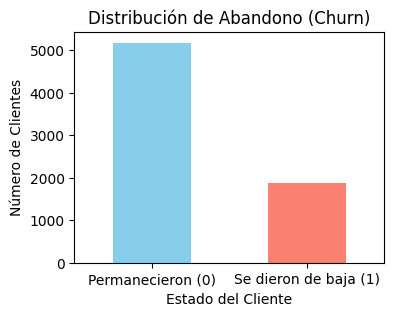

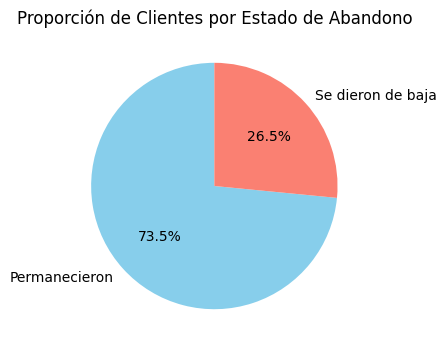

In [65]:
conteo_abandono = datos_normalizado['abandono'].value_counts()

# Gráfico de Barras
plt.figure(figsize=(4, 3))
conteo_abandono.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Abandono (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permanecieron (0)', 'Se dieron de baja (1)'], rotation=0)
plt.show()

# Gráfico de Tarta
plt.figure(figsize=(4, 4))
plt.pie(conteo_abandono, labels=['Permanecieron', 'Se dieron de baja'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Clientes por Estado de Abandono')
plt.show()

## Recuento de evasión por variables categóricas

### Genero

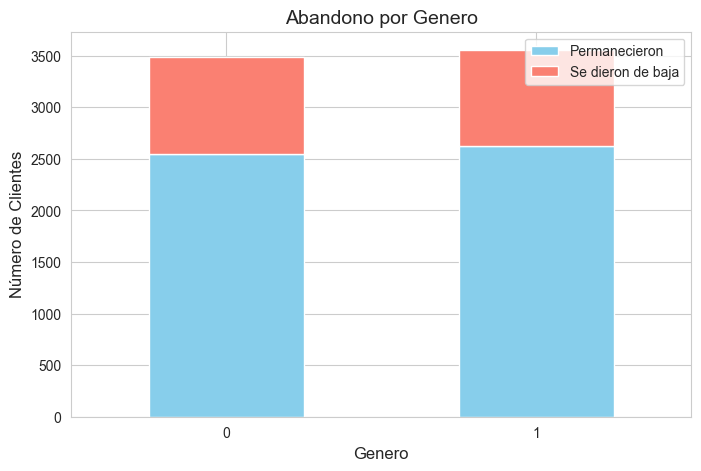

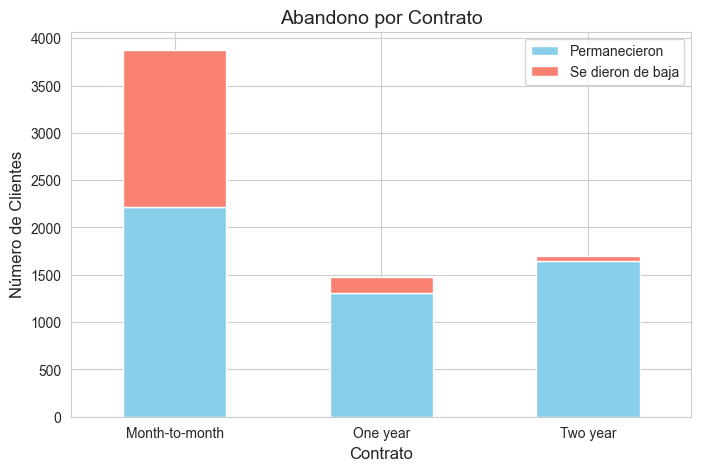

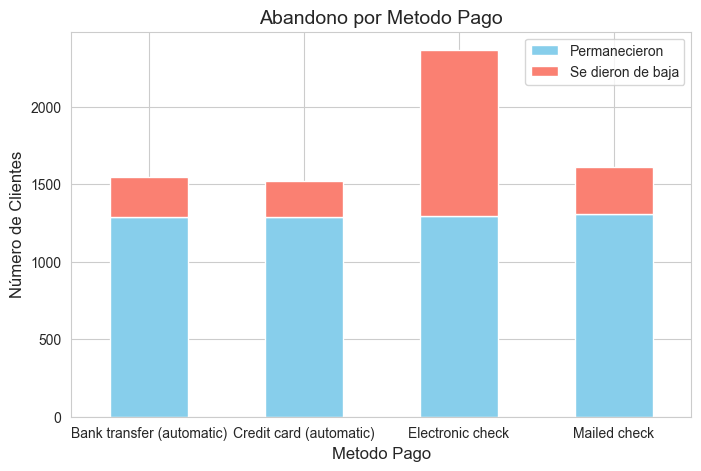

In [66]:


columnas_categoricas = ['genero', 'contrato', 'metodo_pago']

# Establecer el estilo de los gráficos
sns.set_style("whitegrid")

# Bucle para generar un gráfico por cada columna
for columna in columnas_categoricas:
    # Agrupar los datos para calcular la proporción de abandono
    # La media de una variable binaria (0/1) es la proporción de 1s
    proporcion = datos_normalizado.groupby(columna)['abandono'].mean()

    # Calcular el número total de clientes por categoría
    conteo_total = datos_normalizado[columna].value_counts()

    # Crear el DataFrame para el gráfico apilado
    df_grafico = pd.DataFrame({
        'Permanecieron': conteo_total * (1 - proporcion),
        'Se dieron de baja': conteo_total * proporcion
    })

    # Generar el gráfico de barras apilado
    df_grafico.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

    # Configurar etiquetas y título
    plt.title(f'Abandono por {columna.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(columna.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=0)

    # Mostrar el gráfico
    plt.show()

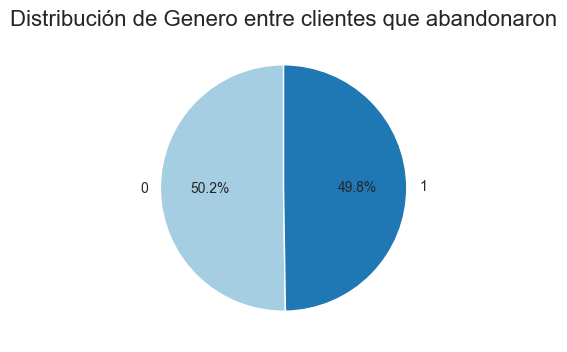

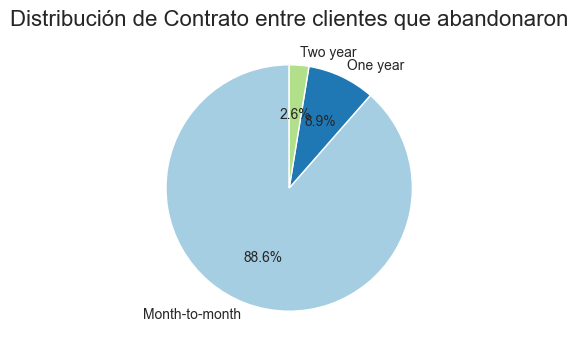

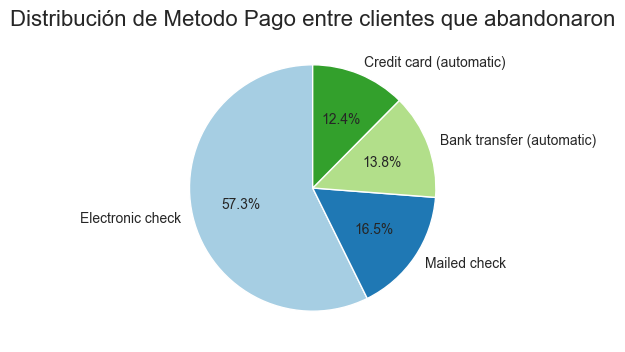

In [68]:
clientes_abandono = datos_normalizado[datos_normalizado['abandono'] == 1]

# Lista de columnas categóricas a analizar
columnas_categoricas = ['genero', 'contrato', 'metodo_pago']

# Bucle para generar un gráfico por cada columna
for columna in columnas_categoricas:
    # Contamos la frecuencia de cada categoría para los clientes que abandonaron
    conteo_categoria = clientes_abandono[columna].value_counts()

    # Generamos el gráfico de tarta
    plt.figure(figsize=(4, 4))
    plt.pie(
        conteo_categoria,
        labels=conteo_categoria.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Distribución de {columna.replace("_", " ").title()} entre clientes que abandonaron', fontsize=16)

    # El círculo interior asegura que el gráfico sea un donut (opcional, si quieres un toque extra)
    # plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
    plt.show()

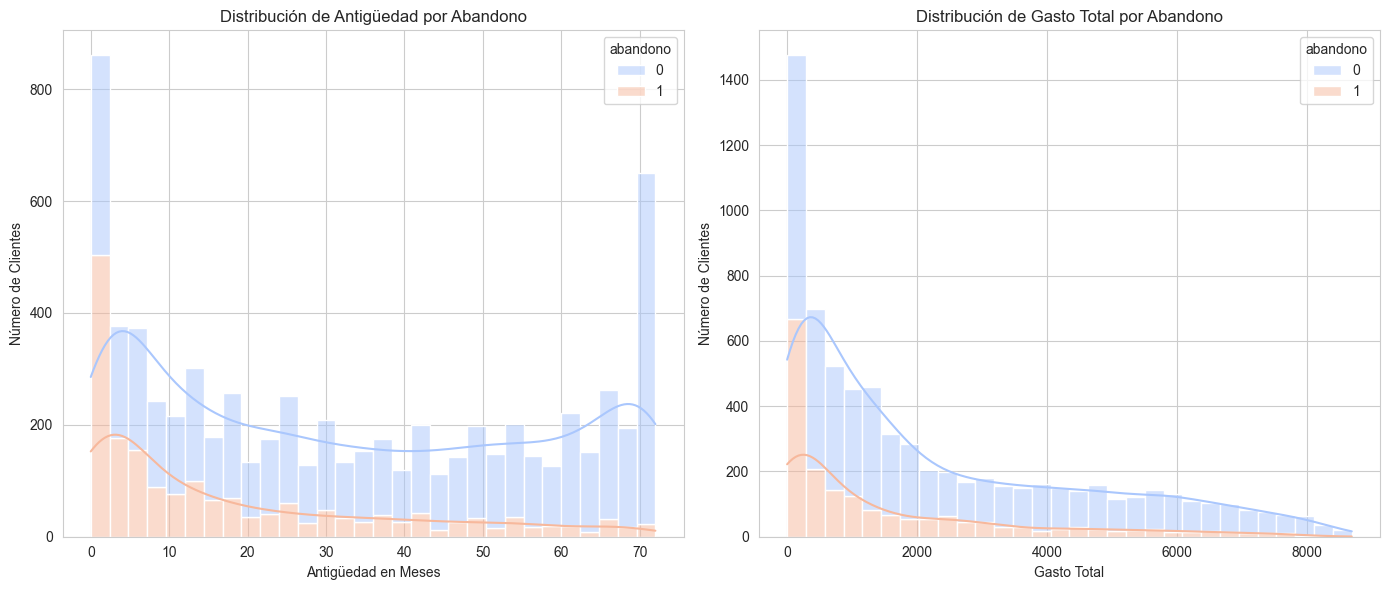

In [71]:
# Crea los histogramas superpuestos
plt.figure(figsize=(14, 6))

# Histograma para 'antiguedad_meses'
plt.subplot(1, 2, 1)
sns.histplot(data=datos_normalizado, x='antiguedad_meses', hue='abandono', multiple='stack', bins=30, kde=True, palette='coolwarm')
plt.title('Distribución de Antigüedad por Abandono')
plt.xlabel('Antigüedad en Meses')
plt.ylabel('Número de Clientes')

# Histograma para 'gasto_total'
plt.subplot(1, 2, 2)
sns.histplot(data=datos_normalizado, x='cargo_total', hue='abandono', multiple='stack', bins=30, kde=True, palette='coolwarm')
plt.title('Distribución de Gasto Total por Abandono')
plt.xlabel('Gasto Total')
plt.ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

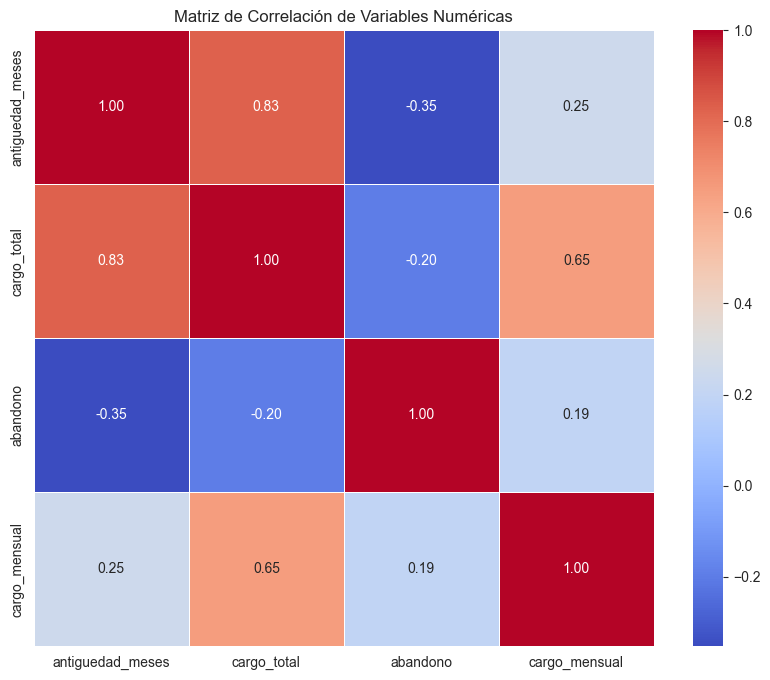

In [73]:
variables_numericas = ['antiguedad_meses', 'cargo_total', 'abandono', 'cargo_mensual']

# Calculamos la matriz de correlación
matriz_correlacion = datos_normalizado[variables_numericas].corr()

# Creamos un mapa de calor para visualizar la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

La correlación entre el número de servicios y el abandono es: -0.07


C:\Users\adria\AppData\Local\Temp\ipykernel_14436\690651730.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correlación'], y=[correlacion], palette=['skyblue' if correlacion > 0 else 'salmon'])


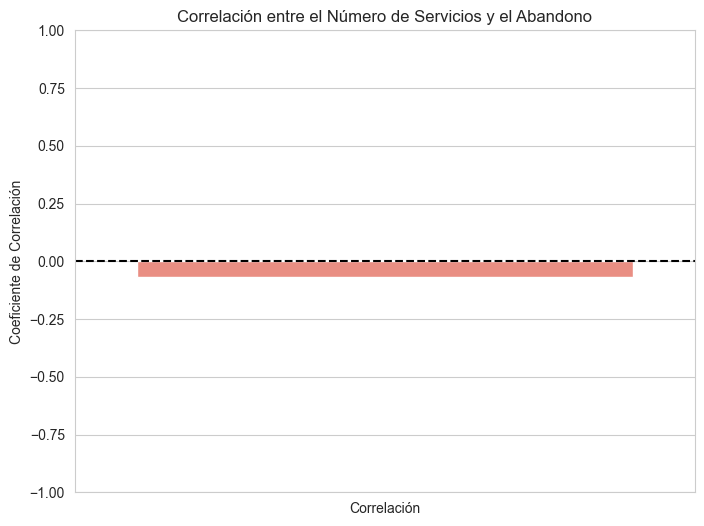

In [78]:
# Paso 1: Crea una columna con el conteo de servicios
# Esto suma las columnas binarias de los servicios para saber cuántos tiene cada cliente.
columnas_servicio = [
    'servicio_telefono', 'multiples_lineas',
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]
datos_normalizado['num_servicios'] = datos_normalizado[columnas_servicio].sum(axis=1)

# Paso 2: Calcula la correlación entre el número de servicios y el abandono
# La función .corr() calcula la correlación de Pearson entre las dos series.
correlacion = datos_normalizado['num_servicios'].corr(datos_normalizado['abandono'])

print(f"La correlación entre el número de servicios y el abandono es: {correlacion:.2f}")

# Paso 3: Visualiza la correlación
# Un gráfico de barras te ayuda a interpretar el resultado de la correlación de una manera más visual.
# Aunque el resultado es un número, visualizarlo puede darte una idea más clara.
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correlación'], y=[correlacion], palette=['skyblue' if correlacion > 0 else 'salmon'])
plt.axhline(0, color='black', linestyle='--')
plt.title('Correlación entre el Número de Servicios y el Abandono')
plt.ylabel('Coeficiente de Correlación')
plt.ylim(-1, 1)  # Establecemos los límites del eje Y de -1 a 1 para mayor claridad
plt.show()

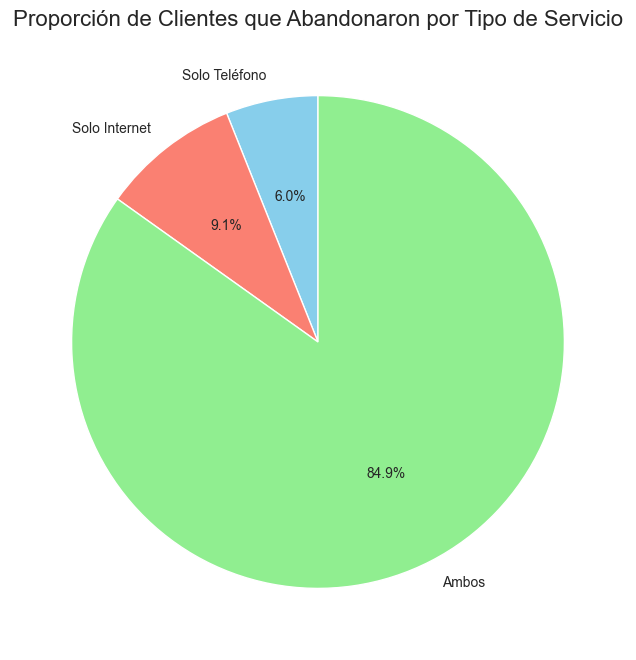

In [79]:
clientes_abandono = datos_normalizado[datos_normalizado['abandono'] == 1]

# Crear una nueva columna para categorizar a los clientes
# 1. Clientes que solo tienen servicio de teléfono:
#    (Servicio de teléfono = 1) Y (Servicio de internet = 0)
solo_telefono = clientes_abandono[(clientes_abandono['servicio_telefono'] == 1) & (clientes_abandono['servicio_internet'] == 0)].shape[0]

# 2. Clientes que solo tienen servicio de internet:
#    (Servicio de internet = 1) Y (Servicio de teléfono = 0)
solo_internet = clientes_abandono[(clientes_abandono['servicio_internet'] == 1) & (clientes_abandono['servicio_telefono'] == 0)].shape[0]

# 3. Clientes que tienen ambos servicios:
#    (Servicio de teléfono = 1) Y (Servicio de internet = 1)
ambos = clientes_abandono[(clientes_abandono['servicio_telefono'] == 1) & (clientes_abandono['servicio_internet'] == 1)].shape[0]

# Crear un DataFrame con los resultados
proporciones = pd.Series([solo_telefono, solo_internet, ambos], index=['Solo Teléfono', 'Solo Internet', 'Ambos'])

# Generar el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Proporción de Clientes que Abandonaron por Tipo de Servicio', fontsize=16)
plt.show()

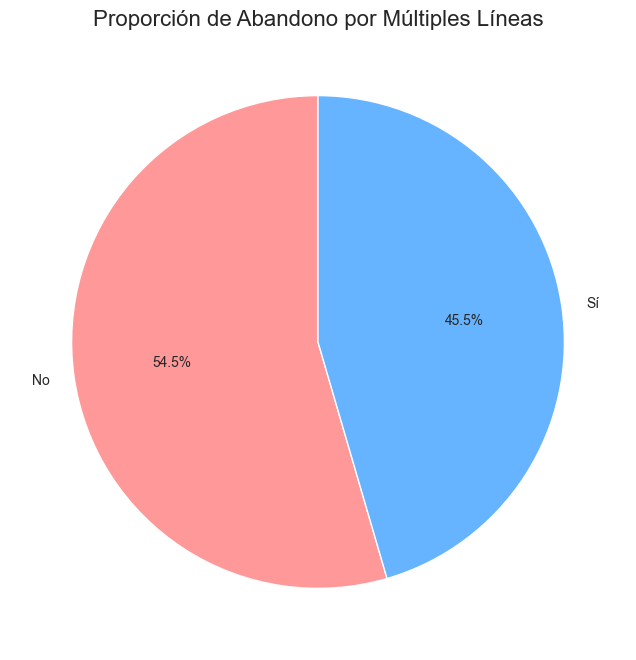

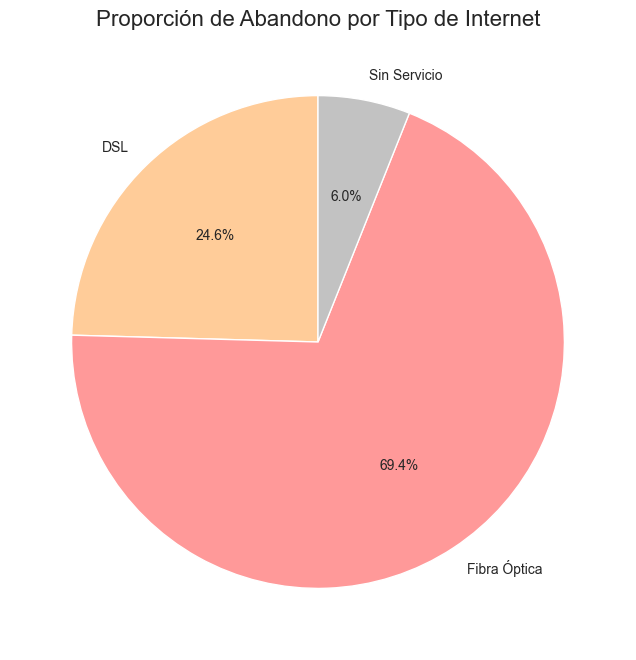

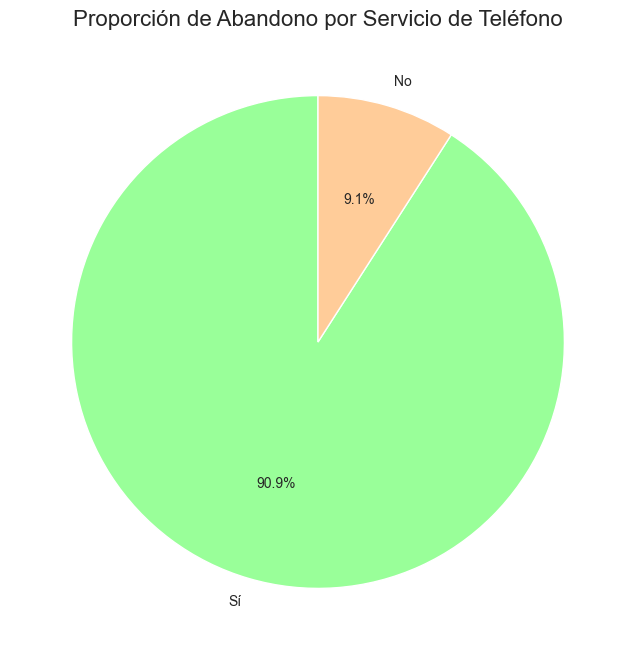

In [ ]:
# Filtramos a los clientes que abandonaron el servicio (asumiendo que 'abandono' == 1)
clientes_abandono = datos_normalizado[datos_normalizado['abandono'] == 1]

# --- Gráfico 1: Proporción por Múltiples Líneas ---
# Contamos cuántos clientes que abandonaron tenían múltiples líneas (1) y cuántos no (0)
conteo_multiple_lineas = clientes_abandono['multiples_lineas'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    conteo_multiple_lineas,
    labels=['No', 'Sí'],  # Asumiendo 0='No' y 1='Sí'
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title('Proporción de Abandono por Múltiples Líneas', fontsize=16)
plt.show()

# --- Gráfico 2: Proporción por Tipo de Servicio de Internet ---
# Contamos cuántos clientes que abandonaron tenían DSL, Fibra Óptica o ningún servicio de internet
dsl = clientes_abandono['tiene_dsl'].sum()
fibra_optica = clientes_abandono['tiene_fibra_optica'].sum()
sin_servicio_internet = clientes_abandono.shape[0] - (dsl + fibra_optica)

proporciones_internet = pd.Series([dsl, fibra_optica, sin_servicio_internet], index=['DSL', 'Fibra Óptica', 'Sin Servicio'])
plt.figure(figsize=(8, 8))
plt.pie(
    proporciones_internet,
    labels=proporciones_internet.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ffcc99', '#ff9999', '#c2c2c2']
)
plt.title('Proporción de Abandono por Tipo de Internet', fontsize=16)
plt.show()

# --- Gráfico 3: Proporción por Servicio de Teléfono ---
# Contamos cuántos clientes que abandonaron tenían servicio de teléfono (1) y cuántos no (0)
conteo_servicio_telefono = clientes_abandono['servicio_telefono'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    conteo_servicio_telefono,
    labels=['Sí', 'No'],  # Asumiendo 1='Sí' y 0='No'
    autopct='%1.1f%%',
    startangle=90,
    colors=['#99ff99', '#ffcc99']
)
plt.title('Proporción de Abandono por Servicio de Teléfono', fontsize=16)
plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_14436\2993905256.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


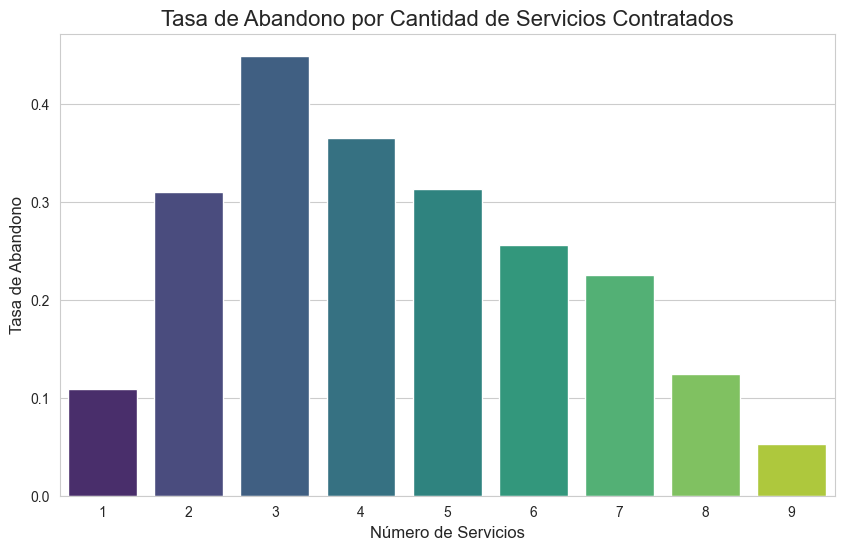

In [85]:
# 1. Crea una columna con el conteo de servicios
# Asumiendo que las columnas de servicio son binarias (0 o 1)
columnas_servicio = [
    'servicio_telefono', 'multiples_lineas', 'servicio_internet',
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]
datos_normalizado['num_servicios'] = datos_normalizado[columnas_servicio].sum(axis=1)

# 2. Agrupa los datos y calcula la tasa de abandono para cada cantidad de servicios
# La media de una variable binaria (0/1) es la proporción de 1s, es decir, la tasa de abandono.
tasa_abandono_por_servicios = datos_normalizado.groupby('num_servicios')['abandono'].mean().reset_index()

# 3. Genera el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x='num_servicios', 
    y='abandono', 
    data=tasa_abandono_por_servicios, 
    palette='viridis'
)

plt.title('Tasa de Abandono por Cantidad de Servicios Contratados', fontsize=16)
plt.xlabel('Número de Servicios', fontsize=12)
plt.ylabel('Tasa de Abandono', fontsize=12)
plt.show()


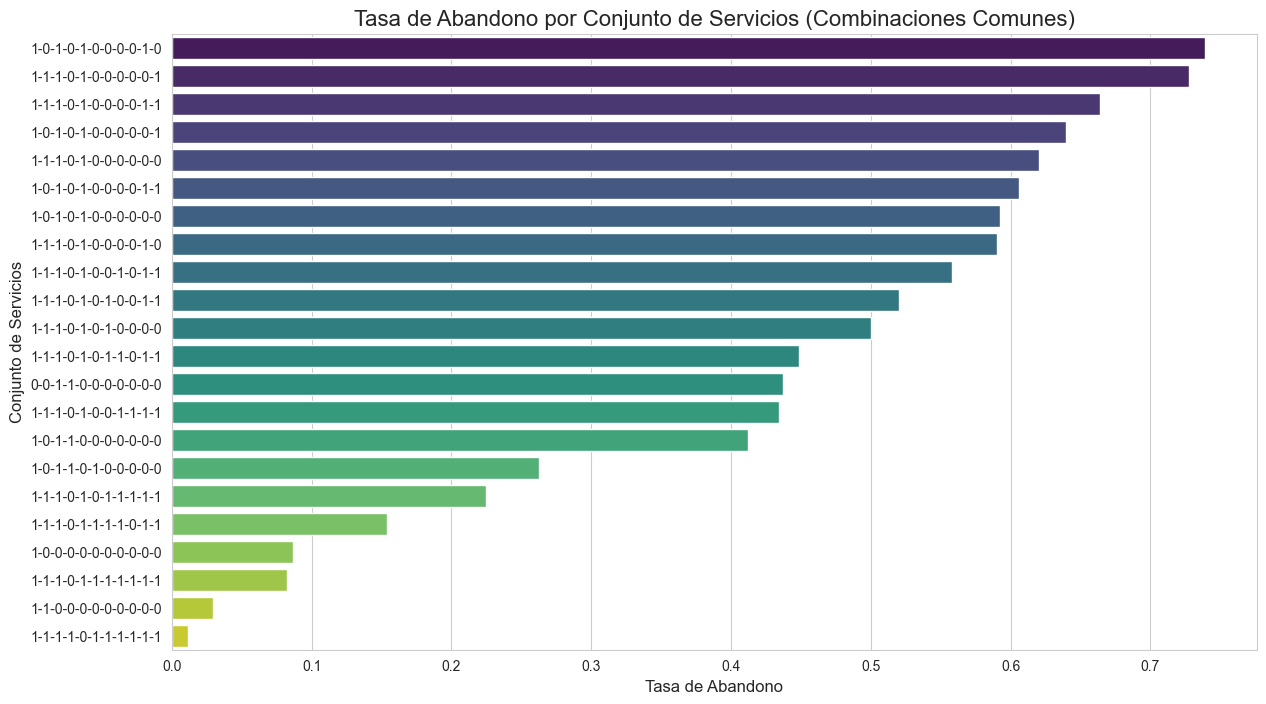

In [ ]:
# Suponiendo que 'datos_normalizado' ya está cargado y preprocesado.
# Asegúrate de que las columnas de servicio estén codificadas como 0 y 1.

# Paso 1: Crear una columna con el conjunto de servicios
# Se concatenan los valores de las columnas de servicio para crear una cadena única para cada cliente.
columnas_servicio = [
    'servicio_telefono', 'multiples_lineas',
    'servicio_internet', 'tiene_dsl', 'tiene_fibra_optica',
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

datos_normalizado['conjunto_servicios'] = datos_normalizado[columnas_servicio].astype(str).agg('-'.join, axis=1)

# Paso 2: Filtrar las combinaciones de servicios más comunes
# Esto ayuda a evitar combinaciones poco frecuentes que no son estadísticamente significativas.
conteo_combinaciones = datos_normalizado['conjunto_servicios'].value_counts()
combinaciones_comunes = conteo_combinaciones[conteo_combinaciones > 50].index
datos_comunes = datos_normalizado[datos_normalizado['conjunto_servicios'].isin(combinaciones_comunes)]

# Paso 3: Calcular la tasa de abandono para cada conjunto de servicios
tasa_abandono_por_conjunto = datos_comunes.groupby('conjunto_servicios')['abandono'].mean().sort_values(ascending=False).reset_index()

# Paso 4: Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(
    x='abandono', 
    y='conjunto_servicios', 
    data=tasa_abandono_por_conjunto, 
    hue='conjunto_servicios',
    palette='viridis',
    legend=False
)

plt.title('Tasa de Abandono por Conjunto de Servicios (Combinaciones Comunes)', fontsize=16)
plt.xlabel('Tasa de Abandono', fontsize=12)
plt.ylabel('Conjunto de Servicios', fontsize=12)
plt.show()